In [33]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:

print(df.shape)

df.isnull().sum()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#What percentage of policy holders have no children?
df.children.value_counts(normalize=True)*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

4) What does the distribution of bmi look like after applying the log transformation on it?

Note: Create a new transformed column, do not replace the existing column.

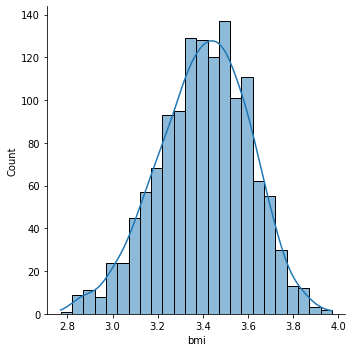

In [20]:
sns.displot(np.log(df.bmi), kde=True)

5) The customers from which region have the highest median insurance charge?

In [21]:
df.groupby('region').charges.median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

6) What is the correlation between age and charges?

<AxesSubplot:>

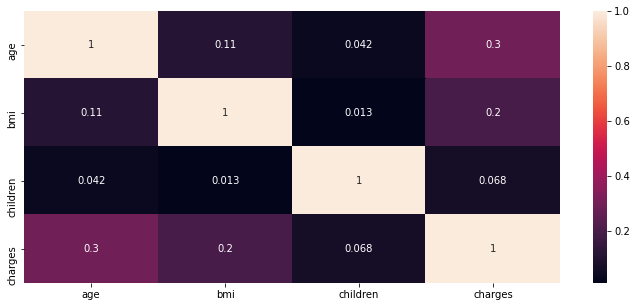

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)



7) Create dummy variables for the categorical columns using pd.get_dummies() with drop_first=True. A dummy variable is dropped for which of the following regions?

In [24]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


8) Split the data in 70:30 ratio to obtain the train and test sets, and build a linear regression model using sklearn LinearRegression and the train set. Which of the following is true for the coefficient of age?

In [25]:
X = df.drop(['charges'],axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(x_train,y_train)

coef_df = pd.DataFrame(
np.append(lr.coef_, lr.intercept_),
index=x_train.columns.tolist() + ["Intercept"],
columns=["Coefficients"]
)
coef_df

,Coefficients
age,251.681865
bmi,322.389107
children,344.964255
sex_male,-282.796347
smoker_yes,24059.390477
region_northwest,-304.090098
region_southeast,-939.342097
region_southwest,-868.188559
Intercept,-11039.238419


9) What percentage of variance in the train set is explained by the model?

In [26]:
lr.score(x_train, y_train)

0.7545557492633161

10) Which of the following is true for the MAE and RMSE on the test set?

In [29]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(x_test)

np.sqrt(mean_squared_error(y_test, y_pred))

mean_absolute_error(y_test, y_pred)

4139.93206476601

In [32]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, lr.predict(x_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  6039.6018713245385
